# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr_data = pd.read_csv("HR Attrition.csv")

In [3]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Exploratory Data Analysis(EDA)

In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


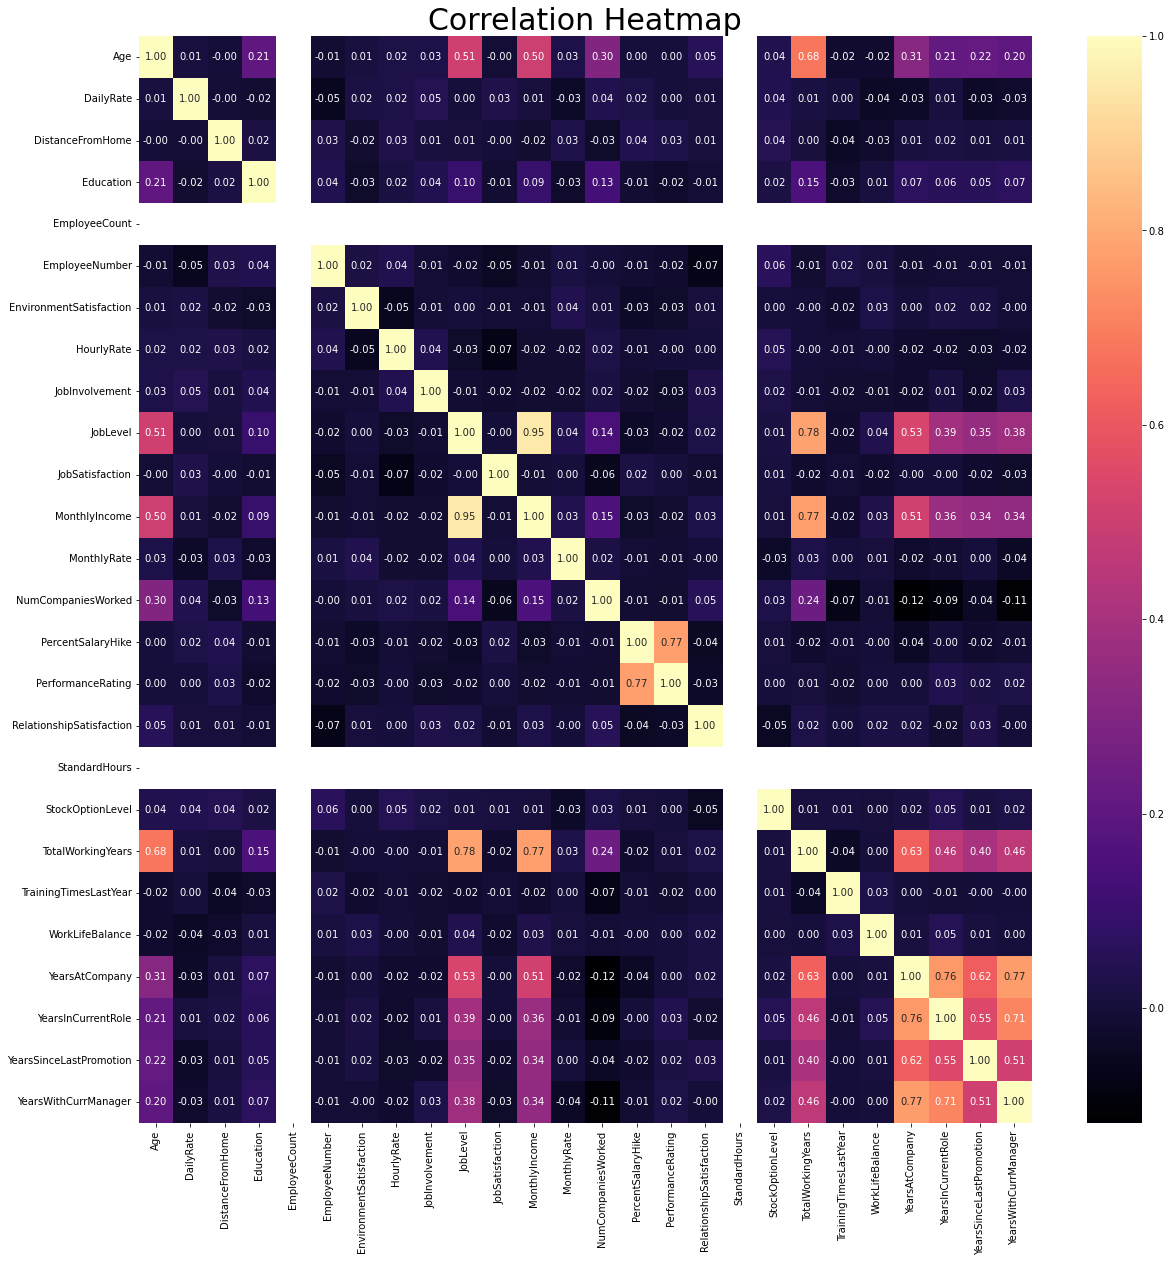

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(hr_data.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()


In [10]:
hr1 = hr_data.corr()
hr1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

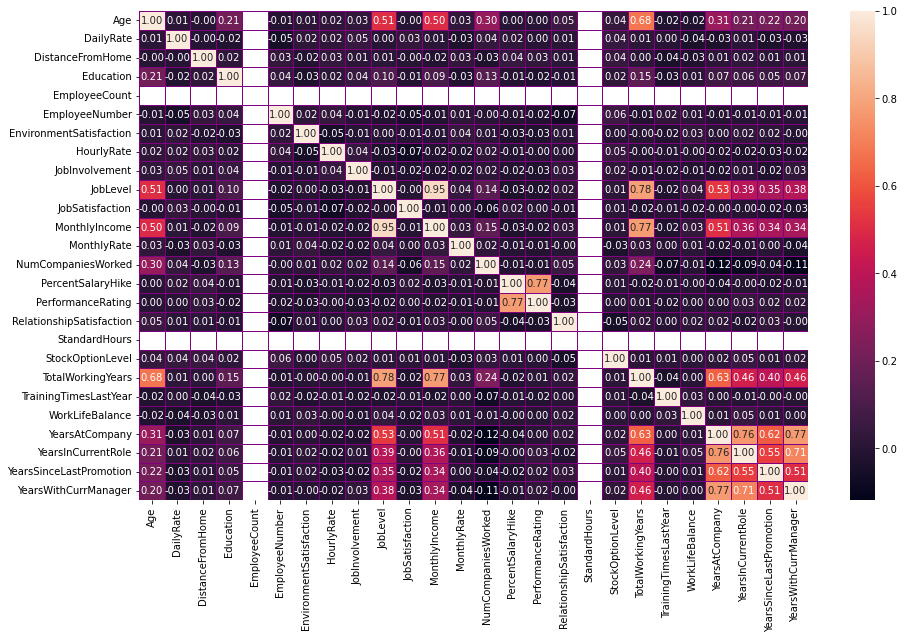

In [11]:
plt.figure(figsize = (15,9))
sns.heatmap(hr1,annot = True,linewidth=0.7,linecolor='purple',fmt='.2f')

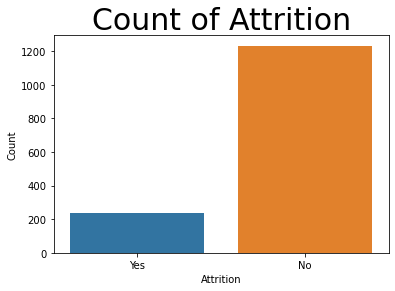

In [12]:
sns.countplot('Attrition', data=hr_data)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [13]:
categorical_cols = [feature for feature in hr_data.columns if hr_data[feature].dtypes=='object']
hr_data[categorical_cols].sample(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
869,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
969,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
168,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,No
380,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Divorced,Y,Yes
322,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y,No
1321,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y,No
811,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,No
47,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
608,Yes,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,Y,No
470,No,Travel_Frequently,Sales,Medical,Male,Sales Representative,Married,Y,No


In [14]:
numerical_cols = [feature for feature in hr_data.columns if hr_data[feature].dtypes!='object']
hr_data[numerical_cols].sample(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
888,35,1212,8,2,1,1243,3,78,2,3,...,2,80,1,16,6,2,13,2,4,12
393,34,1381,4,4,1,523,3,72,3,2,...,1,80,1,6,3,3,3,2,1,2
1279,44,429,1,2,1,1792,3,99,3,1,...,3,80,3,6,2,2,5,3,2,3
415,34,296,6,2,1,555,4,33,1,1,...,4,80,1,3,3,2,2,2,1,0
1113,32,1200,1,4,1,1574,4,62,3,2,...,2,80,1,9,3,2,6,5,1,2
1132,40,118,14,2,1,1598,4,84,3,2,...,3,80,1,5,2,3,5,4,1,2
1170,27,591,2,3,1,1648,4,87,3,1,...,3,80,0,6,0,2,4,2,1,2
402,30,1082,12,3,1,533,2,83,3,2,...,2,80,0,6,6,3,5,4,4,4
518,38,243,7,4,1,709,4,46,2,2,...,1,80,0,8,2,3,7,7,0,5
1276,37,589,9,2,1,1787,2,46,2,2,...,1,80,2,5,2,3,5,2,0,3


In [15]:
hr_data.nunique().sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate


# Age Density of Employees

<AxesSubplot:xlabel='Age', ylabel='Density'>

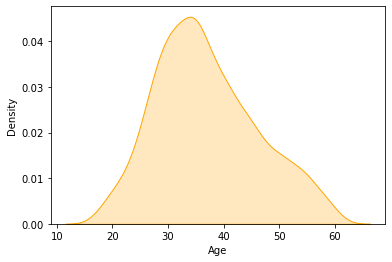

In [16]:
# Age distrubition
sns.kdeplot(hr_data['Age'],shade=True,color='Orange')

# Attritions Count

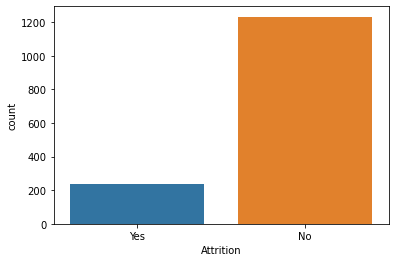

In [17]:
# Investigating if the attrition level is really high.
sns.countplot(x="Attrition", data=hr_data)
plt.show()

The amount of Attrition values in our dataset this countplot describes how imbalanced our dataset is.
From this countplot we can see that how many of the emplooyes state that they have attrition?

# Monthly Income and Gender

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

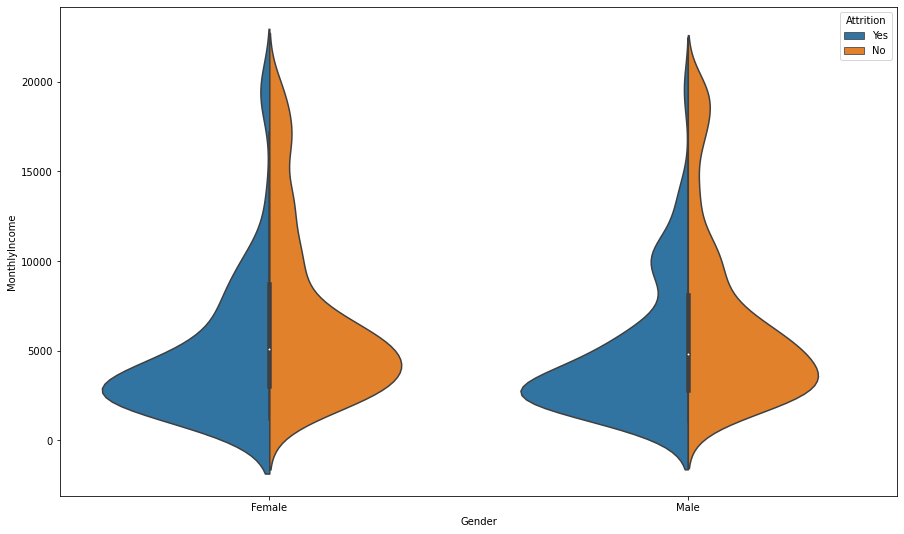

In [18]:
# to show the difference between the Monthly Income and the gender/attrition  
fig,ax = plt.subplots(figsize=(15,9))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=hr_data)

AS we can see there are a little bit differances in the monthly income of Male And Female. 

I wanted to analyze the Gender and Monthly Income that is supported with Attrition Rate beacuse "Gender Inequality" and "Gender Gap" are common topics these days.

# Age-DailyRate Relashionship for the Employees Attrition

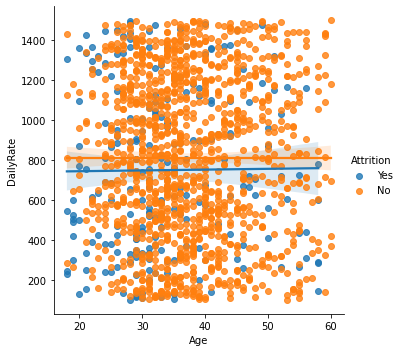

In [19]:
# The relation of Age-DailyRate to the attrition of the employee
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = hr_data)
plt.show()

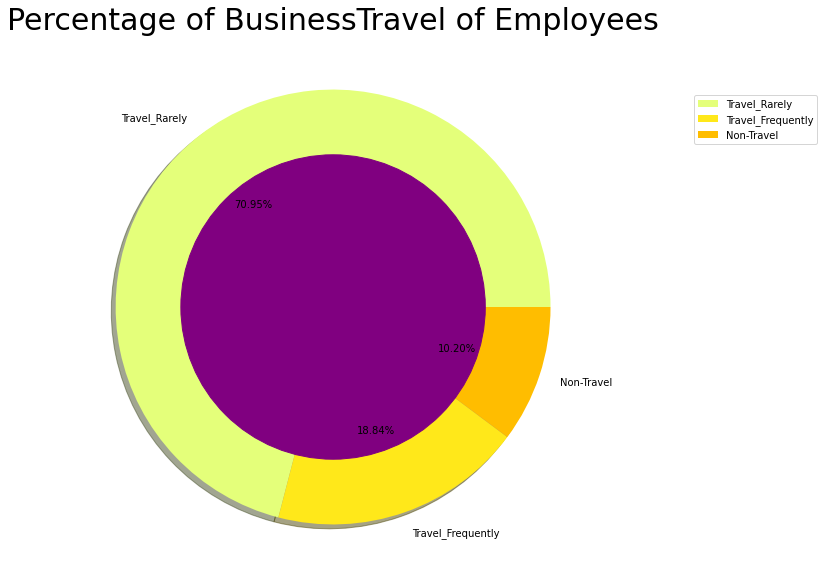

In [20]:
size = hr_data['BusinessTravel'].value_counts()
labels = hr_data['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='purple')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

# Employees Ratio In Education-Field

Text(0.5, 1.0, 'Education Field Ratio')

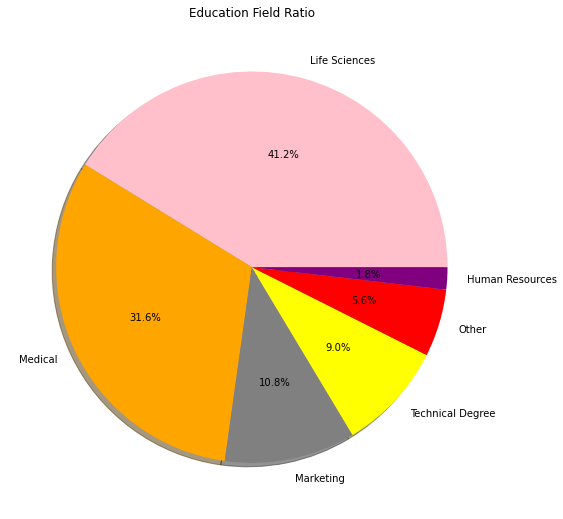

In [21]:
val_counts = hr_data.EducationField.value_counts()
labels = val_counts.index
size_labels = val_counts.values
colors = ["pink","orange", "grey", "yellow", "red", "purple", "green"]
plt.figure(figsize=(9,9))
plt.pie(size_labels,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True)
plt.title("Education Field Ratio")

Here we can analyse that there is only 1.8% of Human Resources in the Education Field Ration which is the Least value Whereas Life Sciences has the Highest Ratio that is 41.2%.

# Attrition-Job Satisfaction Points Ratio

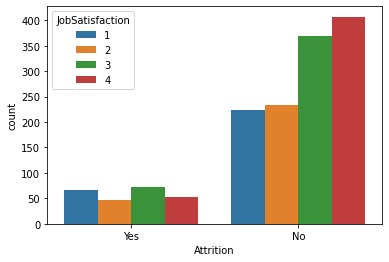

In [22]:
sns.countplot(x="Attrition", hue='JobSatisfaction', data=hr_data)
plt.show()

# Analysis on Attrition Rate-Important Features About The IBM Employees

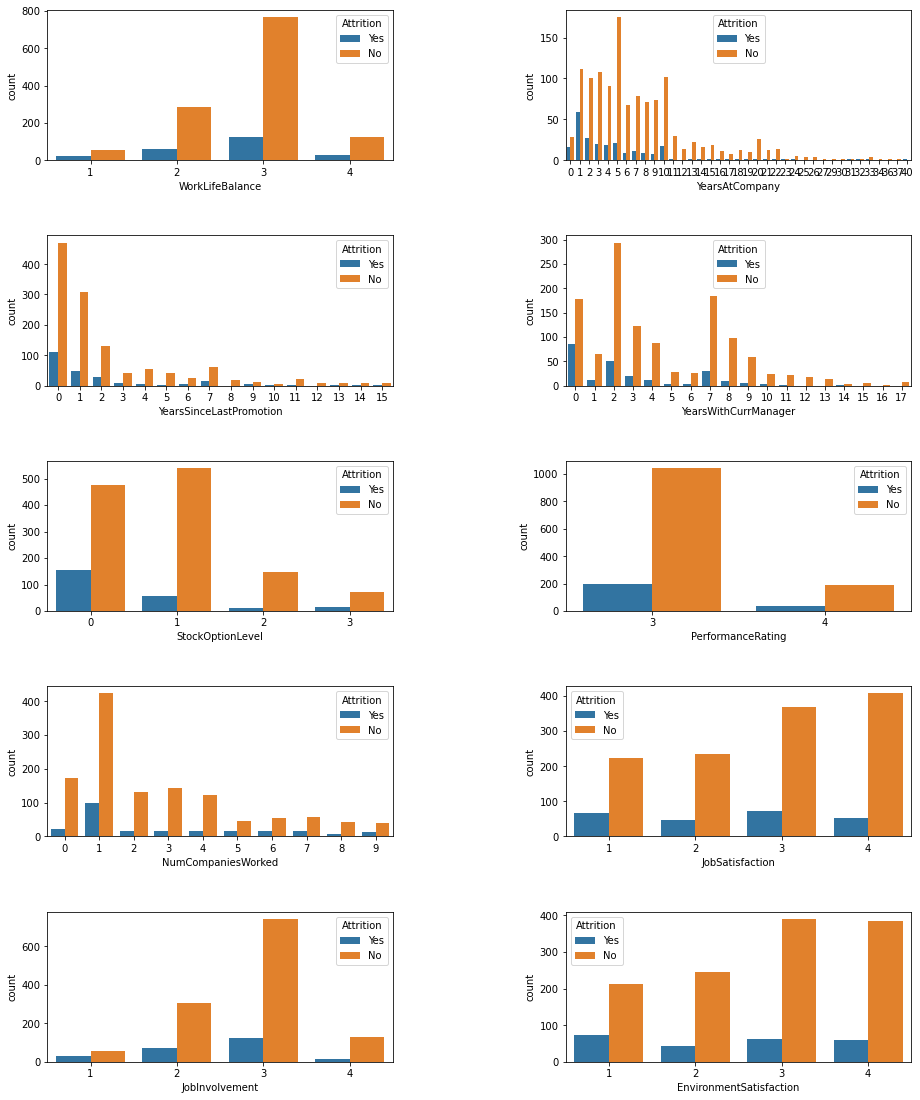

In [23]:
column_labels = [  
 "WorkLifeBalance",
 "YearsAtCompany",
 "YearsSinceLastPromotion",
 "YearsWithCurrManager",
 "StockOptionLevel",
 "PerformanceRating",
 "NumCompaniesWorked",
 "JobSatisfaction",
 "JobInvolvement",
 "EnvironmentSatisfaction"
]
plt.figure(figsize=(15,30))
for ind,col in enumerate(column_labels):
    plt.subplot(8,2,ind+1)
    sns.countplot(x=col, hue="Attrition", data=hr_data)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

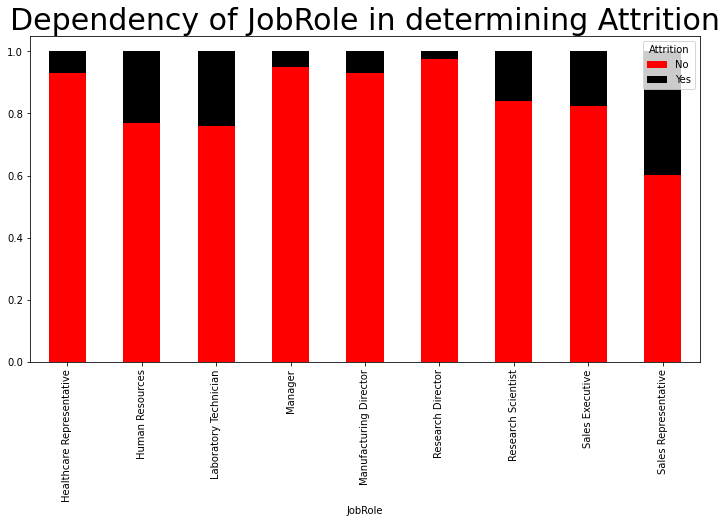

In [24]:
data=pd.crosstab(hr_data['JobRole'], hr_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['red', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()


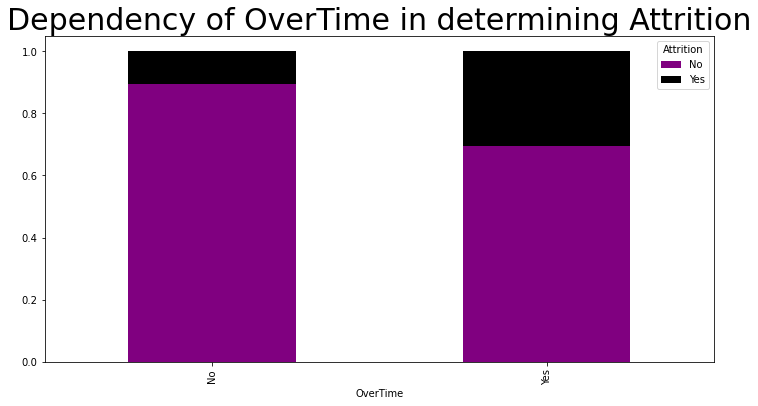

In [25]:
data=pd.crosstab(hr_data['OverTime'], hr_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['purple', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

# Attrition and Work Life Balance / Distance From Home 

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

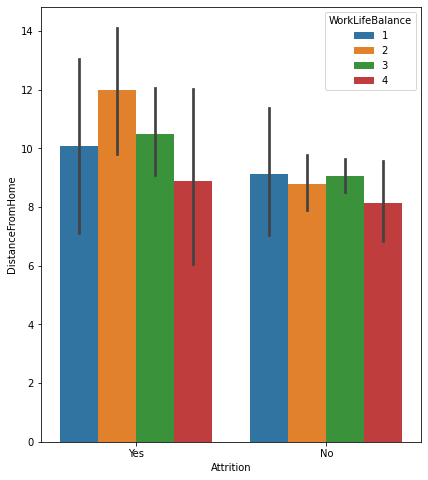

In [26]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.barplot(x="Attrition", y="DistanceFromHome", hue="WorkLifeBalance", data=hr_data)

AS Observed from above figure,Work-Life Balance is one of the most important aspects of life and it is often stated that people who spent a lof of time on the roads have much more less time besides work.

# Attrition Rate over Some Departments

In [27]:
pd.crosstab(columns=[hr_data.Attrition],index=[hr_data.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


It Indicates if there is a particular department that have the rates higher than the others,will affects the Attrition on Employees.

In [28]:
pd.crosstab(columns=[hr_data.Attrition],index=[hr_data.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


# Data Processing

In [29]:
hr_data.drop("EmployeeNumber",axis=1,inplace=True)
hr_data.drop("EmployeeCount", axis=1, inplace=True)
hr_data.drop("Over18", axis=1, inplace=True)
hr_data.drop("StandardHours", axis=1, inplace=True)

In [30]:
hr_data['Attrition'] = np.where(hr_data['Attrition'] == 'No',0,1)

In [31]:
hr_data['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
hr_data['BusinessTravel'].replace('Travel_Frequently',3, inplace=True)
hr_data['BusinessTravel'].replace('Non-Travel',2, inplace=True)

In [32]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,3,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,3,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


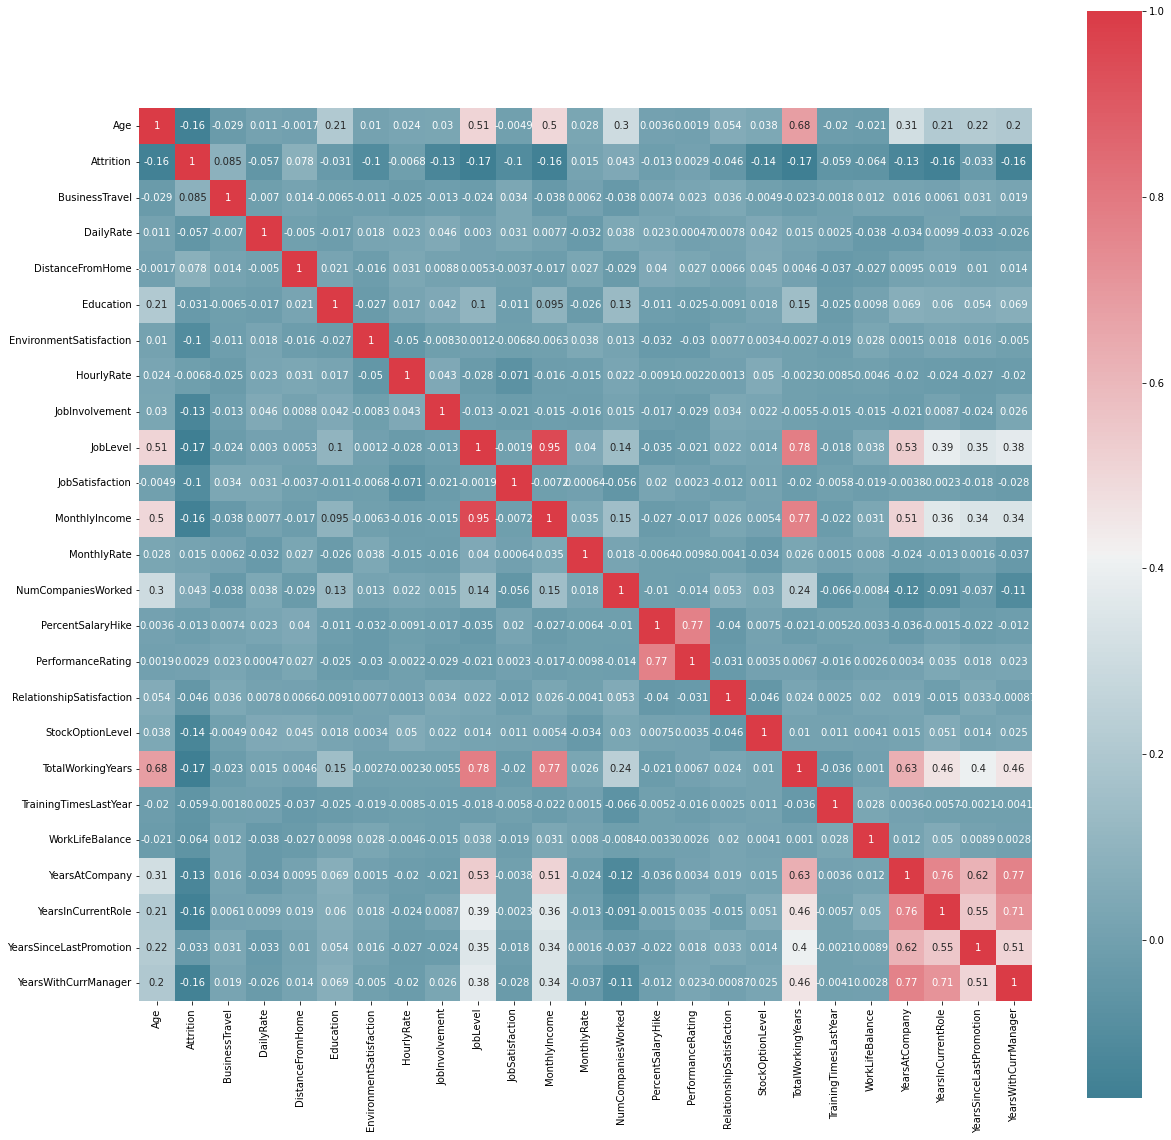

In [33]:
def hr_data_correlation_mat():
    corr_matrix = hr_data.corr()
    f , ax = plt.subplots(figsize=(20,20))
    sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix, dtype=bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True,
                ax=ax,
                annot=True)
    
hr_data_correlation_mat()


In [34]:
features_to_drop = [
    "DailyRate",
    "HourlyRate",
    "MonthlyRate",
    "PercentSalaryHike", 
    "YearsInCurrentRole",
    "YearsAtCompany",
    "YearsWithCurrManager",
    "TotalWorkingYears",
    "JobLevel"
]

for col in features_to_drop:
    hr_data.drop(col, axis=1, inplace=True)

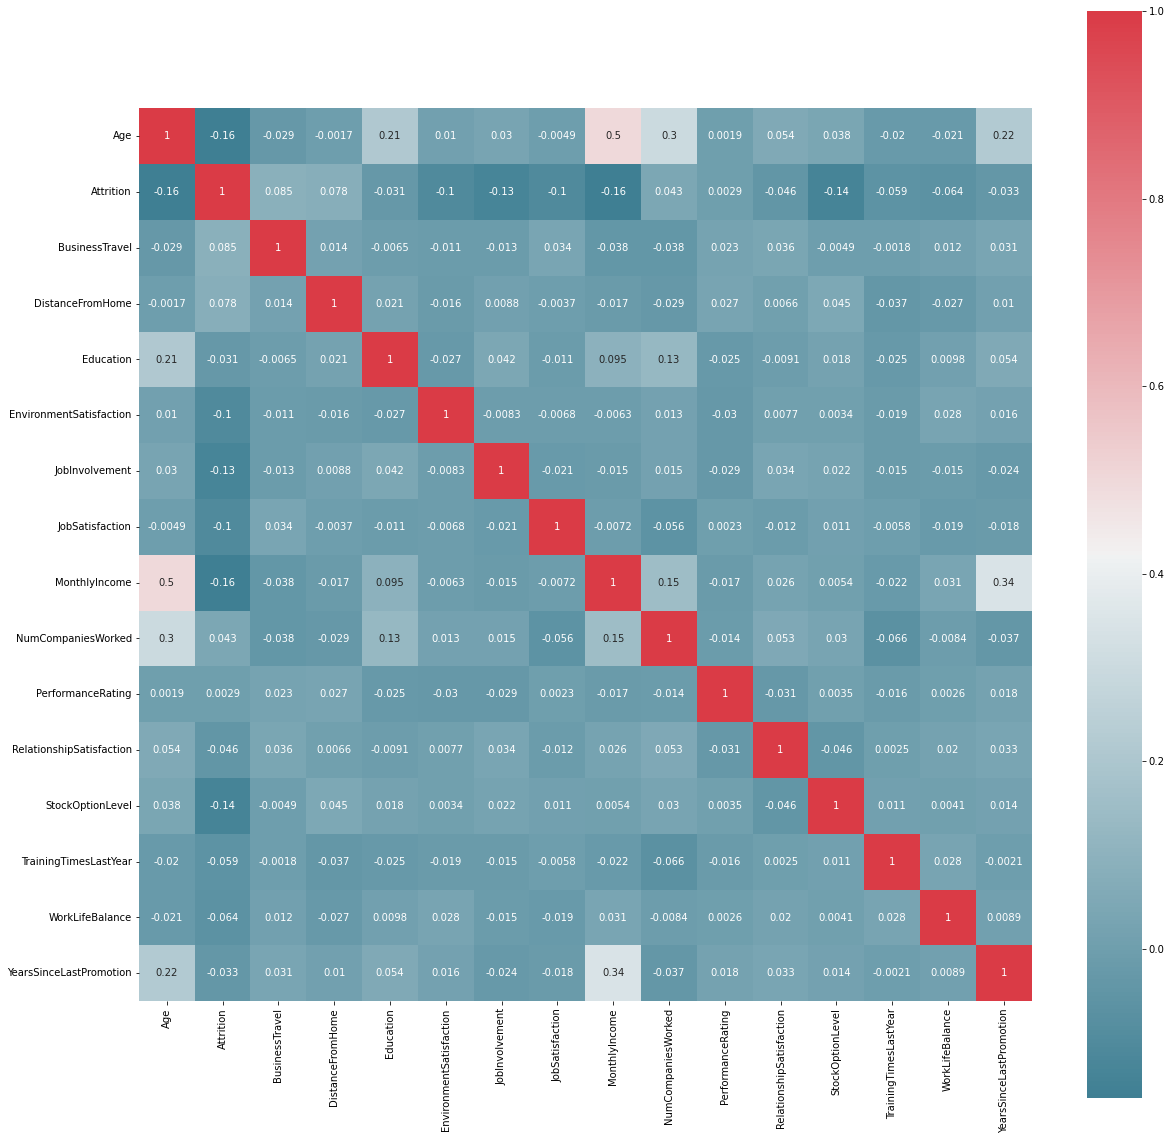

In [35]:
hr_data_correlation_mat()

# Label Encoding for Non-numeric Features

In [36]:
from sklearn.preprocessing import LabelEncoder
def transform(feature):
    le=LabelEncoder()
    hr_data[feature]=le.fit_transform(hr_data[feature])
    print(le.classes_)

In [37]:
df_columns = hr_data.columns
df_columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion'],
      dtype='object')

In [38]:
df_object_columns = hr_data.select_dtypes(include='object').columns
for col in df_object_columns:
    transform(col)

['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [39]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,1,1,2,1,2,1,2,0,3,...,2,5993,8,1,3,1,0,0,1,0
1,49,0,3,1,8,1,1,3,1,2,...,1,5130,1,0,4,4,1,3,3,1
2,37,1,1,1,2,2,4,4,1,2,...,2,2090,6,1,3,2,0,3,3,0
3,33,0,3,1,3,4,1,4,0,3,...,1,2909,1,1,3,3,0,3,3,3
4,27,0,1,1,2,1,3,1,1,3,...,1,3468,9,0,3,4,1,3,3,2


In [40]:
np.mean(hr_data, axis=0)

Age                           36.923810
Attrition                      0.161224
BusinessTravel                 1.478912
Department                     1.260544
DistanceFromHome               9.192517
Education                      2.912925
EducationField                 2.247619
EnvironmentSatisfaction        2.721769
Gender                         0.600000
JobInvolvement                 2.729932
JobRole                        4.458503
JobSatisfaction                2.728571
MaritalStatus                  1.097279
MonthlyIncome               6502.931293
NumCompaniesWorked             2.693197
OverTime                       0.282993
PerformanceRating              3.153741
RelationshipSatisfaction       2.712245
StockOptionLevel               0.793878
TrainingTimesLastYear          2.799320
WorkLifeBalance                2.761224
YearsSinceLastPromotion        2.187755
dtype: float64

In [41]:
hr_data.min()

Age                           18
Attrition                      0
BusinessTravel                 1
Department                     0
DistanceFromHome               1
Education                      1
EducationField                 0
EnvironmentSatisfaction        1
Gender                         0
JobInvolvement                 1
JobRole                        0
JobSatisfaction                1
MaritalStatus                  0
MonthlyIncome               1009
NumCompaniesWorked             0
OverTime                       0
PerformanceRating              3
RelationshipSatisfaction       1
StockOptionLevel               0
TrainingTimesLastYear          0
WorkLifeBalance                1
YearsSinceLastPromotion        0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

hr_data['Age'] = scaler.fit_transform(hr_data[['Age']])
hr_data['MonthlyIncome'] = scaler.fit_transform(hr_data[['MonthlyIncome']])

# Train,Test & Split

In [43]:
X = hr_data.drop("Attrition", axis=1)
y = hr_data["Attrition"]

In [44]:
from sklearn.model_selection import train_test_split

np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,stratify=y)

In [45]:
X_train.shape

(1249, 21)

In [46]:
X_test.shape

(221, 21)

In [47]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [48]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [49]:
skfold

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Model Training 
Logistic Regression

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

np.random.seed(12345)

clf = LogisticRegression()

grid = [
    {
        "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        "solver": ['liblinear', 'newton-cg','sag', 'saga', 'lbfgs'],
        "penalty": ['l2', 'l1','none', 'elasticnet'],
        "multi_class": ['auto', 'ovr', 'multinomial'],
        "max_iter": [100,250,500,750,1000]
    }
]

gs = GridSearchCV(
    estimator=clf,
    param_grid=grid,
    cv=skfold
)

gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                          'max_iter': [100, 250, 500, 750, 1000],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l2', 'l1', 'none', 'elasticnet'],
                          'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                     'lbfgs']}])

In [51]:
start_time = time.time()
gs.best_estimator_.fit(X_train, y_train)
end_time = time.time()
print(f"It took {end_time - start_time} seconds to fit the train data of employees")

It took 0.2489933967590332 seconds to fit the train data of employees


In [52]:
gs.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
gs.best_score_

0.8727164658634539

# Store The Best Estimator

In [54]:
lg_optimized = gs.best_estimator_

In [55]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn import metrics

model_names = list()
accuracy_values = list()
precision_values = list()
recall_values = list()
f1_values = list()
roc_auc_values = list()

In [56]:
def evaluate_preds(model_name, clf, test_train_flag): 
    
    if test_train_flag: # test
        y_true = y_test
        s_time = time.time()
        y_preds = clf.predict(X_test)
        e_time = time.time()
        duration_calculator(model_name, s_time, e_time, 0)
    else: # train
        y_true = y_train
        s_time = time.time()
        y_preds = clf.predict(X_train)
        e_time = time.time()
        duration_calculator(model_name, s_time, e_time, 1)
    
    
    
    results = f'''
Model Name: {model_name}
Accuracy: {accuracy_score(y_true,y_preds)}
Precision: {precision_score(y_true,y_preds)}
Recall: {recall_score(y_true, y_preds)}
F1: {f1_score(y_true, y_preds)}
ROC AUC: {roc_auc_score(y_true, y_preds)}
    '''
    
    model_names.append(model_name)
    accuracy_values.append(accuracy_score(y_true,y_preds))
    precision_values.append(precision_score(y_true,y_preds))
    recall_values.append(recall_score(y_true, y_preds))
    f1_values.append(f1_score(y_true, y_preds))
    roc_auc_values.append(roc_auc_score(y_true, y_preds))
    
    return results

In [57]:
def duration_calculator(model_name, start_time, end_time, dtype):
    diff = end_time - start_time
    print(f"The Training Duration for {model_name} Model is {diff} seconds.")
    train_durations.append(diff) if dtype else test_durations.append(diff)

In [58]:
def conf_matrix(model_name, clf):
    y_true = y_test
    y_preds = clf.predict(X_test)
    
    print(model_name, "Confusion Matrix")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_preds), display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [59]:
train_durations = list()
test_durations = list()

In [60]:
print(evaluate_preds("Logistic Regression (Test)", gs.best_estimator_, 1))

The Training Duration for Logistic Regression (Test) Model is 0.0030002593994140625 seconds.

Model Name: Logistic Regression (Test)
Accuracy: 0.8597285067873304
Precision: 0.6666666666666666
Recall: 0.2777777777777778
F1: 0.39215686274509803
ROC AUC: 0.6253753753753754
    


Logistic Regression Confusion Matrix


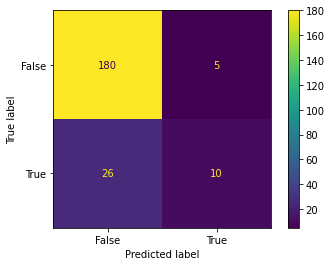

In [61]:
conf_matrix("Logistic Regression", gs.best_estimator_)

# Model Training For SVM

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


clf = SVC() 

grid = [
  {
      'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
      'gamma': ['scale', 'auto'], 
      'kernel': ['linear','rbf'],
      'decision_function_shape': ['ovo', 'ovr']
  }
]

gs = GridSearchCV(
    estimator=clf,
    param_grid=grid,
    cv=skfold
)

start_time = time.time()
gs.fit(X_train, y_train)
end_time = time.time()

In [63]:
start_time = time.time()
gs.best_estimator_.fit(X_train, y_train)
end_time = time.time()
print(f"It took {end_time - start_time} seconds to fit the train data of employees")

It took 187.65583992004395 seconds to fit the train data of employees


In [64]:
gs.best_estimator_.get_params()

{'C': 1000,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [65]:
gs.best_score_

0.859881124497992

In [66]:
svm_optimized = gs.best_estimator_

In [67]:
print(evaluate_preds("SVM (Test)", gs.best_estimator_, 1))

The Training Duration for SVM (Test) Model is 0.009992837905883789 seconds.

Model Name: SVM (Test)
Accuracy: 0.8597285067873304
Precision: 0.8571428571428571
Recall: 0.16666666666666666
F1: 0.27906976744186046
ROC AUC: 0.5806306306306307
    


SVM Confusion Matrix


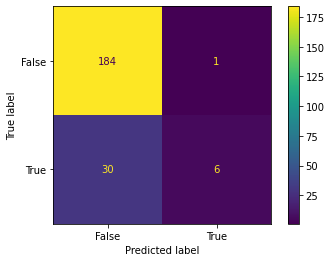

In [68]:
conf_matrix("SVM", gs.best_estimator_)

# Model Training (Random Forest)

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

grid = [
    {
        'n_estimators': [50,100, 500], 
        'max_features': ['log2', 'sqrt','auto'], 
        'criterion': ['entropy', 'gini'],
        'max_depth': [5, 10, None], 
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1,3,5],
        'n_jobs': [-1]
    }
]

gs = GridSearchCV(
    estimator=clf,
    param_grid=grid,
    cv=skfold
)

start_time = time.time()
gs.fit(X_train, y_train)
end_time = time.time()

In [70]:
start_time = time.time()
gs.best_estimator_.fit(X_train, y_train)
end_time = time.time()
print(f"It took {end_time - start_time} seconds to fit the train data")

It took 0.3599975109100342 seconds to fit the train data


In [71]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
gs.best_score_

0.8646971887550201

In [73]:
rf_optimized = gs.best_estimator_

In [74]:
print(evaluate_preds("Random Forest (Test)", gs.best_estimator_, 1))

The Training Duration for Random Forest (Test) Model is 0.06300020217895508 seconds.

Model Name: Random Forest (Test)
Accuracy: 0.8506787330316742
Precision: 0.6666666666666666
Recall: 0.16666666666666666
F1: 0.26666666666666666
ROC AUC: 0.5752252252252252
    


Random Forest Confusion Matrix


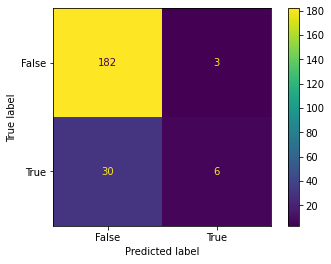

In [75]:
conf_matrix("Random Forest", gs.best_estimator_)

# Model Comparisons 
(Evaluation Metrics and Train/Test Durations)

In [76]:
print(evaluate_preds("Logistic Regression (Train)", gs.best_estimator_, 0))

The Training Duration for Logistic Regression (Train) Model is 0.07599759101867676 seconds.

Model Name: Logistic Regression (Train)
Accuracy: 0.9799839871897518
Precision: 1.0
Recall: 0.8756218905472637
F1: 0.9336870026525199
ROC AUC: 0.9378109452736318
    


In [77]:
print(evaluate_preds("SVM (Train)", gs.best_estimator_, 0))

The Training Duration for SVM (Train) Model is 0.07300257682800293 seconds.

Model Name: SVM (Train)
Accuracy: 0.9799839871897518
Precision: 1.0
Recall: 0.8756218905472637
F1: 0.9336870026525199
ROC AUC: 0.9378109452736318
    


In [78]:
print(evaluate_preds("Random Forest (Train)", gs.best_estimator_, 0))

The Training Duration for Random Forest (Train) Model is 0.07099795341491699 seconds.

Model Name: Random Forest (Train)
Accuracy: 0.9799839871897518
Precision: 1.0
Recall: 0.8756218905472637
F1: 0.9336870026525199
ROC AUC: 0.9378109452736318
    


In [79]:
model_dict = {
    "Model": model_names,
    "Accuracy": accuracy_values,
    "Precision": precision_values,
    "Recall": recall_values,
    "F1 Score": f1_values,
    "ROC AUC": roc_auc_values
}
hr = pd.DataFrame(model_dict)
hr

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (Test),0.859729,0.666667,0.277778,0.392157,0.625375
1,SVM (Test),0.859729,0.857143,0.166667,0.279070,0.580631
2,Random Forest (Test),0.850679,0.666667,0.166667,0.266667,0.575225
3,Logistic Regression (Train),0.979984,1.000000,0.875622,0.933687,0.937811
4,SVM (Train),0.979984,1.000000,0.875622,0.933687,0.937811
5,Random Forest (Train),0.979984,1.000000,0.875622,0.933687,0.937811


In [80]:
train_durations

[0.07599759101867676, 0.07300257682800293, 0.07099795341491699]

In [81]:
test_durations

[0.0030002593994140625, 0.009992837905883789, 0.06300020217895508]

In [82]:
model_names

['Logistic Regression (Test)',
 'SVM (Test)',
 'Random Forest (Test)',
 'Logistic Regression (Train)',
 'SVM (Train)',
 'Random Forest (Train)']

In [83]:
durations = test_durations
for dur in train_durations:
    test_durations.append(dur)
duration_dict = {
    "Model": model_names,
    "Durations (seconds)": durations
}
print(durations)
hr = pd.DataFrame(duration_dict)
hr

[0.0030002593994140625, 0.009992837905883789, 0.06300020217895508, 0.07599759101867676, 0.07300257682800293, 0.07099795341491699]


,Model,Durations (seconds)
0,Logistic Regression (Test),0.003000
1,SVM (Test),0.009993
2,Random Forest (Test),0.063000
3,Logistic Regression (Train),0.075998
4,SVM (Train),0.073003
5,Random Forest (Train),0.070998


# Picking the Best Model and 5 Most Important Features

In [84]:
def get_feature_importance(clf, feature_names):
    
    print(len(clf.coef_[0]))
    print(len(feature_names))
    
    feature_importance = (
        pd.DataFrame(
            {
                'variable': feature_names,
                'coefficient': clf.coef_[0]
            }
        )
        .round(decimals=2) \
        .sort_values('coefficient', ascending=False) \
        .style.bar(color=['red', 'green'], align='zero')
    )
    return feature_importance

In [86]:
df_columns = df_columns.drop("Attrition")
get_feature_importance(lg_optimized, df_columns)

21
21


,variable,coefficient
14,OverTime,0.890000
2,Department,0.300000
11,MaritalStatus,0.220000
7,Gender,0.170000
1,BusinessTravel,0.160000
13,NumCompaniesWorked,0.070000
20,YearsSinceLastPromotion,0.030000
3,DistanceFromHome,0.020000
4,Education,0.000000
5,EducationField,0.000000


In [87]:
hr_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,0.547619,1,1,2,1,2,1,2,0,3,...,2,0.262454,8,1,3,1,0,0,1,0
1,0.738095,0,3,1,8,1,1,3,1,2,...,1,0.217009,1,0,4,4,1,3,3,1
2,0.452381,1,1,1,2,2,4,4,1,2,...,2,0.056925,6,1,3,2,0,3,3,0
3,0.357143,0,3,1,3,4,1,4,0,3,...,1,0.100053,1,1,3,3,0,3,3,3
4,0.214286,0,1,1,2,1,3,1,1,3,...,1,0.129489,9,0,3,4,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0,3,1,23,2,3,3,1,4,...,1,0.082254,4,0,3,3,1,3,3,0
1466,0.500000,0,1,1,6,1,3,4,1,2,...,1,0.472986,4,0,3,1,1,5,3,1
1467,0.214286,0,1,1,4,3,1,2,1,4,...,1,0.270300,1,1,4,2,1,0,3,0
1468,0.738095,0,3,2,2,3,3,4,1,2,...,1,0.230700,2,0,3,4,0,3,2,0


In [88]:
hr_data_with_five_features = pd.DataFrame({
    "OverTime": hr_data["OverTime"],
    "MonthlyIncome": hr_data['MonthlyIncome'],
    "Age": hr_data["Age"],
    "Department": hr_data['Department'],
    "JobInvolvement": hr_data['JobInvolvement'],
    "Attrition": hr_data['Attrition']
})
hr_data_with_five_features

,OverTime,MonthlyIncome,Age,Department,JobInvolvement,Attrition
0,1,0.262454,0.547619,2,3,1
1,0,0.217009,0.738095,1,2,0
2,1,0.056925,0.452381,1,2,1
3,1,0.100053,0.357143,1,3,0
4,0,0.129489,0.214286,1,3,0
...,...,...,...,...,...,...
1465,0,0.082254,0.428571,1,4,0
1466,0,0.472986,0.500000,1,2,0
1467,1,0.270300,0.214286,1,4,0
1468,0,0.230700,0.738095,2,2,0


In [89]:
X_five = hr_data_with_five_features.drop("Attrition", axis=1)
y_five = hr_data_with_five_features["Attrition"]

np.random.seed(12345)

X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(X_five,y_five,test_size=0.15,stratify=y)

In [90]:
lg_optimized_five_features = LogisticRegression(C=1.0,max_iter=100,multi_class="multinomial",penalty="l2",solver="lbfgs")
lg_optimized_five_features.fit(X_train_five, y_train_five)

LogisticRegression(multi_class='multinomial')

In [91]:
y_preds_five = lg_optimized_five_features.predict(X_test_five)

In [92]:
print("Optimized Logistic Regression with 5 features Evaluation Metrics")
res = f'''
Accuracy : {accuracy_score(y_test_five,y_preds_five)}
Precision: {precision_score(y_test_five,y_preds_five)}
Recall: {recall_score(y_test_five, y_preds_five)}
F1: {f1_score(y_test_five, y_preds_five)}
ROC AUC: {roc_auc_score(y_test_five, y_preds_five)}
'''
print(res)

Optimized Logistic Regression with 5 features Evaluation Metrics

Accuracy : 0.832579185520362
Precision: 0.4444444444444444
Recall: 0.1111111111111111
F1: 0.17777777777777776
ROC AUC: 0.5420420420420421



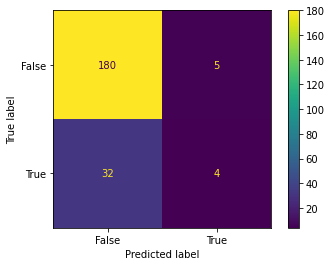

In [93]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_five, y_preds_five), display_labels = [False, True])
cm_display.plot()
plt.show()

# Model and DataFrame Storing 

Pickle

In [95]:
import pickle

best_model = lg_optimized

pickle.dump(best_model, open('model.pickle', 'wb'))

preprocessed_data = pickle.dump(hr_data, open('preprocessing.pickle', 'wb'))

# **************DONE***************